<a href="https://colab.research.google.com/github/tommyEzreal/study_low_level/blob/main/pytorch/%EB%AA%A8%EB%91%90%EB%A5%BC%EC%9C%84%ED%95%9C%EB%94%A5%EB%9F%AC%EB%8B%9D2/softmax_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

In [2]:
torch.manual_seed(0)

In [3]:
# why use one-hot encoding? 
# equalize the loss of each feature 

Multi-calss Classification

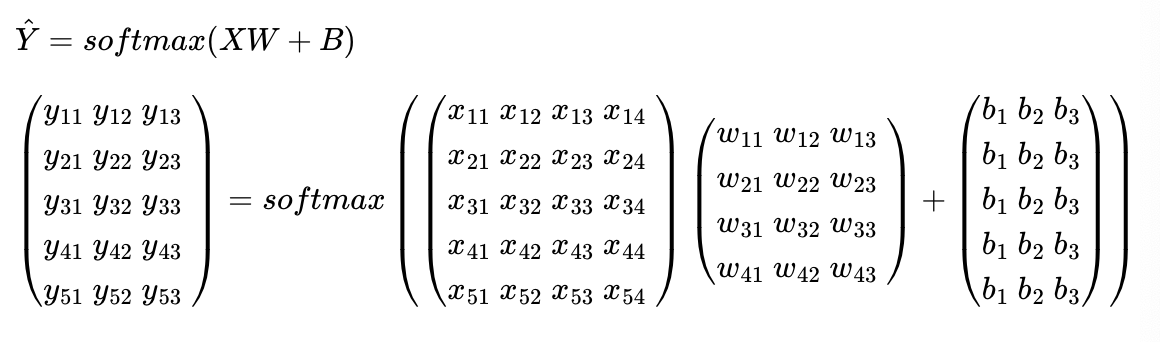

softmax in low-level

In [4]:
z = torch.FloatTensor([1,2,3])

h = F.softmax(z, dim=0)
h

tensor([0.0900, 0.2447, 0.6652])

In [5]:
h.sum() # cause it s softmax

tensor(1.)

cost function

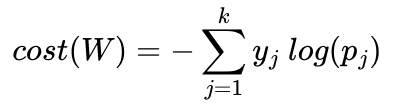

In [6]:
# random z 
z = torch.rand((3,5), requires_grad=True)
z

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074],
        [0.6341, 0.4901, 0.8964, 0.4556, 0.6323],
        [0.3489, 0.4017, 0.0223, 0.1689, 0.2939]], requires_grad=True)

In [7]:
h = F.softmax(z, dim=1)
h

tensor([[0.2222, 0.2917, 0.1478, 0.1544, 0.1840],
        [0.2000, 0.1732, 0.2600, 0.1673, 0.1996],
        [0.2194, 0.2313, 0.1583, 0.1833, 0.2077]], grad_fn=<SoftmaxBackward0>)

In [8]:
# random label
y = torch.randint(5, (3,)).long()
y 

tensor([1, 1, 3])

In [9]:
y.unsqueeze(1)

tensor([[1],
        [1],
        [3]])

In [10]:
# one-hot encoding 
y_one_hot = torch.zeros_like(h)
print(y_one_hot)
print()
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # label 2,3,0
print(y_one_hot)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

tensor([[0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.]])


In [11]:
cost = (y_one_hot * -torch.log(h)).sum(dim=1).mean()
print(cost)

tensor(1.5608, grad_fn=<MeanBackward0>)


with nn.fucntion

In [12]:
print(torch.log(F.softmax(z, dim=1)))
print()
# or
print(torch.log_softmax(z, dim=1))


tensor([[-1.5041, -1.2322, -1.9119, -1.8684, -1.6930],
        [-1.6096, -1.7536, -1.3472, -1.7880, -1.6113],
        [-1.5167, -1.4639, -1.8433, -1.6968, -1.5717]], grad_fn=<LogBackward0>)

tensor([[-1.5041, -1.2322, -1.9119, -1.8684, -1.6930],
        [-1.6096, -1.7536, -1.3472, -1.7880, -1.6113],
        [-1.5167, -1.4639, -1.8433, -1.6968, -1.5717]],
       grad_fn=<LogSoftmaxBackward0>)


In [13]:
# cost 

(y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()

# or use nll_loss  

F.nll_loss(F.log_softmax(z,dim=1),y)

# or use cross-entropy 

F.cross_entropy(z,y)

tensor(1.5608, grad_fn=<NllLossBackward0>)

softmax classification 

In [14]:
# k=3 

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [15]:
x_train.shape, y_train.shape

(torch.Size([8, 4]), torch.Size([8]))

In [16]:
y_one_hot = torch.zeros(8,3) # class 3 

print("y one-hot:")
print(y_one_hot.scatter_(1, y_train.unsqueeze(1),1))
print()
print(y_one_hot.shape)

y one-hot:
tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

torch.Size([8, 3])


In [17]:
# weight and bais 

# W must be (4,3)  

# x_train(8,4).matmul(W)(4,3) + b(8,) = y_one_hot(8,3)

W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

In [18]:
h = F.softmax(x_train.matmul(W)+b, dim=1)
-torch.log(h) * y_one_hot # element wise 

tensor([[0.0000, 0.0000, 1.0986],
        [0.0000, 0.0000, 1.0986],
        [0.0000, 0.0000, 1.0986],
        [0.0000, 1.0986, 0.0000],
        [0.0000, 1.0986, 0.0000],
        [0.0000, 1.0986, 0.0000],
        [1.0986, 0.0000, 0.0000],
        [1.0986, 0.0000, 0.0000]], grad_fn=<MulBackward0>)

In [19]:
# training loop

epochs = 1000
for epoch in range(epochs+1):
  
  h = F.softmax(x_train.matmul(W)+b, dim=1)
  cost = (y_one_hot * -torch.log(h)).sum(dim=1).mean()


  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

    # 100번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))  


Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [20]:
# training loop (high-level)

epochs = 1000
for epoch in range(epochs+1):
  
  z = x_train.matmul(W) + b
  cost = F.cross_entropy(z,y_train)


  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

    # 100번마다 로그 출력
  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))  


Epoch    0/1000 Cost: 0.385263
Epoch  100/1000 Cost: 0.358230
Epoch  200/1000 Cost: 0.330755
Epoch  300/1000 Cost: 0.306726
Epoch  400/1000 Cost: 0.294556
Epoch  500/1000 Cost: 0.285188
Epoch  600/1000 Cost: 0.276404
Epoch  700/1000 Cost: 0.268142
Epoch  800/1000 Cost: 0.260353
Epoch  900/1000 Cost: 0.252995
Epoch 1000/1000 Cost: 0.246030


In [21]:
# with nn.Module 

model = nn.Linear(4,3)


optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs+1):
  pred = model(x_train)
  cost = F.cross_entropy(pred, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))  


Epoch    0/1000 Cost: 1.555345
Epoch  100/1000 Cost: 0.641865
Epoch  200/1000 Cost: 0.560256
Epoch  300/1000 Cost: 0.506056
Epoch  400/1000 Cost: 0.461593
Epoch  500/1000 Cost: 0.421902
Epoch  600/1000 Cost: 0.384677
Epoch  700/1000 Cost: 0.348420
Epoch  800/1000 Cost: 0.312016
Epoch  900/1000 Cost: 0.275260
Epoch 1000/1000 Cost: 0.246030


Mnist classification 

In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print(device)

cuda


In [3]:
random.seed(0)
torch.manual_seed(0)
if device=='cuda':
  torch.cuda.manual_seed_all(0)

In [68]:
epochs = 15
batch_size = 64

In [69]:
# dataset 

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download=True)

In [70]:
# dataloader
data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle= True,
                         drop_last = True) # 마지막 배치 버릴지 여부 

In [71]:
# model 
# 28*28 imagesize = 784 
linear = nn.Linear(784,10, bias = True).to(device) # input 784, output 10 

In [72]:
# cost func
criterion = nn.CrossEntropyLoss().to(device)
# = torch.nn.functional.cross_entropy()

# optim
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)


In [73]:
from tqdm.auto import tqdm

for epoch in tqdm(range(epochs)):
  avg_cost = 0
  total_batch = len(data_loader)

  for X,Y in data_loader:
    X = X.view(-1,28*28).to(device) # 28*28 to 784 vec * batchsize
    Y = Y.to(device)

    h = linear(X)
    cost = criterion(h, Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))



  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0001 cost = 0.477775872
Epoch: 0002 cost = 0.336652726
Epoch: 0003 cost = 0.314266652
Epoch: 0004 cost = 0.302090526
Epoch: 0005 cost = 0.294269830
Epoch: 0006 cost = 0.288801938
Epoch: 0007 cost = 0.284545451
Epoch: 0008 cost = 0.280869693
Epoch: 0009 cost = 0.278028995
Epoch: 0010 cost = 0.275908172
Epoch: 0011 cost = 0.273272783
Epoch: 0012 cost = 0.271943957
Epoch: 0013 cost = 0.270105362
Epoch: 0014 cost = 0.268494785
Epoch: 0015 cost = 0.267162144


In [81]:
# test

import numpy as np 

with torch.no_grad():
  
  X_test = mnist_test.test_data.view(-1,784).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  pred = linear(X_test)
  correct_pred = torch.argmax(pred, 1) == Y_test
  acc = correct_pred.float().mean()
  print("ACC:",np.round(acc.item(),4))



ACC: 0.8801


Label: 3
prediction: 3


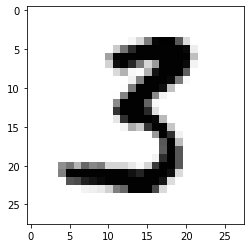

In [78]:
with torch.no_grad():
  r = random.randint(0 , len(mnist_test)-1)
  X_data = mnist_test.test_data[r: r+1].view(-1,784).float().to(device)
  Y_data = mnist_test.test_labels[r: r+1].to(device)

  print("Label:",Y_data.item())
  single_pred = linear(X_data)
  print("prediction:", torch.argmax(single_pred,1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), 
             cmap = 'Greys',
             interpolation= 'nearest')
  plt.show()